# MINST Classification KNN (Centroid Approach)

- this notebook will use MINST dataset of handwritten digIts from one to 9 
- we will use only 10000 data-point for training and 1000 data-point for test as asked

#### Essintial imports 

In [1]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import pandas as pd
%matplotlib inline
from itertools import product
from IPython.display import display, clear_output
from itertools import combinations ,combinations_with_replacement
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from collections import namedtuple, OrderedDict
print(tf.__version__)
print(keras.__version__)


1.15.0
2.2.4-tf


#### importing preprocessed data from keras  

In [2]:
from keras.datasets import mnist 
(xtrain , y_train) , (xtest,y_test) = mnist.load_data()

Using TensorFlow backend.


In [3]:
print("Train samples:", xtrain.shape, y_train.shape)
print("Test samples:", xtest.shape, y_test.shape)

Train samples: (60000, 28, 28) (60000,)
Test samples: (10000, 28, 28) (10000,)


##### taking small portion as asked 

In [4]:
xtrain=xtrain[50000:]
y_train=y_train[50000:]
xtest=xtest[9000:]
y_test=y_test[9000:]

In [5]:
print("Train samples:", xtrain.shape, y_train.shape)
print("Test samples:", xtest.shape, y_test.shape)

Train samples: (10000, 28, 28) (10000,)
Test samples: (1000, 28, 28) (1000,)


##### plotting digits in grey scale just for illustration 

4
8
9
6
2
8
1
1
1
6


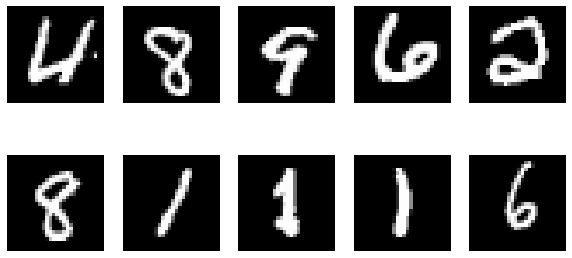

In [6]:
cols = 5
rows = 2
fig = plt.figure(figsize=(2 * cols , 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, 1000)
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(xtrain[random_index, :] ,cmap='gray')
        print(y_train[random_index])
        
plt.show()

#### Imaged_grid is function that slice the photo into certain amount of grids 

In [8]:

def imaged_grid(img , row , col ):
    x , y = img.shape
    return (img.reshape ( x //row, row, -1, col).swapaxes(1,2).reshape(-1, row, col))

(49, 4, 4)


array([[[  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       [[  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       [[  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       [[  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       [[  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       [[  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       [[  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       [[  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       [[  0,   0,   0, 

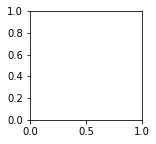

In [9]:
fig = plt.figure(figsize=(2  , 2))
ax = fig.add_subplot(1, 1, 1)
#ax.imshow(xtest[8] ,cmap='gray')
print(imaged_grid(xtest[4] , 4 , 4 ).shape)
imaged_grid(xtest[5] , 4 , 4 )




#### Get the centroid (centet of mass of grey scale) of each slice (grid) made

In [10]:
def get_centroid(img ,L):
    feature = []
    for grid in imaged_grid(img , L[0] , L[1] ) :
        X = 0 
        Y = 0 
        s = 0
        for index, bit in np.ndenumerate(grid):
          s+= bit
          X += bit * index[0]
          Y += bit * index[1]  
        if s != 0 :
            feature.append( X/ s )
            feature.append(Y/ s )
        else :
             feature.append(0)
             feature.append(0)
    return np.array(feature)


#### extracting train and test features using previous funcution 

In [12]:
l = [14,24]
trainf = [get_centroid(img,l)  for img in xtrain ]
trainf = np.array (trainf)
print (f'train feature size =>{trainf.shape}')
testf = [get_centroid(img,l)  for img in xtest]
testf = np.array (testf)
print(f'test feature size =>{testf.shape}')

train feature size =>(10000, 32)
test feature size =>(1000, 32)


### Fitting feature using KNeighborsClassifier using ecludian distance then predict using Accuracy metric 

In [13]:
model = KNeighborsClassifier(4 , metric = 'euclidean')
model.fit (trainf , y_train)
ypred = model.predict(testf)

In [14]:
print("accuracy=", accuracy_score(y_test, ypred) )

accuracy= 0.855


### More hyperparameter tuning  

In [15]:
A = [4, 7, 14 ]
l = []
temp = combinations_with_replacement(A,2)
for i in list(temp):
    l.append(np.array(i).tolist())  
l
    

[[4, 4], [4, 7], [4, 14], [7, 7], [7, 14], [14, 14]]

In [16]:
class RunBuilder ():
    @staticmethod
    def get_runs(params):
        Run = namedtuple('Run' , params.keys())
        
        runs = []
        
        for v in product (*params.values()):
            runs.append(Run(*v))
            
        return  runs

In [19]:
Params = dict(
    l = [[4, 4], [4, 7], [4, 14], [7, 7], [7, 14], [14, 14]],
    KNN = [3,4,5,7]
)

runs =RunBuilder.get_runs(Params)
display( len(runs) , runs)


24

[Run(l=[4, 4], KNN=3),
 Run(l=[4, 4], KNN=4),
 Run(l=[4, 4], KNN=5),
 Run(l=[4, 4], KNN=7),
 Run(l=[4, 7], KNN=3),
 Run(l=[4, 7], KNN=4),
 Run(l=[4, 7], KNN=5),
 Run(l=[4, 7], KNN=7),
 Run(l=[4, 14], KNN=3),
 Run(l=[4, 14], KNN=4),
 Run(l=[4, 14], KNN=5),
 Run(l=[4, 14], KNN=7),
 Run(l=[7, 7], KNN=3),
 Run(l=[7, 7], KNN=4),
 Run(l=[7, 7], KNN=5),
 Run(l=[7, 7], KNN=7),
 Run(l=[7, 14], KNN=3),
 Run(l=[7, 14], KNN=4),
 Run(l=[7, 14], KNN=5),
 Run(l=[7, 14], KNN=7),
 Run(l=[14, 14], KNN=3),
 Run(l=[14, 14], KNN=4),
 Run(l=[14, 14], KNN=5),
 Run(l=[14, 14], KNN=7)]

In [18]:

for i in range (len(runs)):
    run = runs[i]
    
    trainf = [get_centroid(img , run.l)  for img in xtrain ]
    trainf = np.array (trainf)
    testf = [get_centroid(img , run.l)  for img in xtest]
    testf = np.array (testf)

    
    model = KNeighborsClassifier(run.KNN , metric = 'euclidean')
    model.fit (trainf , y_train)
    ypred = model.predict(testf)

    if i == 0:
        df = pd.DataFrame(columns = ['run', 'accuracy' , 'Image_Grid_X' , 'Image_Grid_Y' , 'n_neighbor'])
    run_params = []
    results = OrderedDict()
    results["run"] = i
    results["accuracy"] = accuracy_score(y_test, ypred) * 100
    results['Image_Grid_X'] = run.l[0]
    results['Image_Grid_Y'] = run.l[1]
    results['n_neighbor'] = run.KNN
    df = df .append([results] ,ignore_index = True)

    clear_output(wait = True)
    display(df)
    

,run,accuracy,Image_Grid_X,Image_Grid_Y,n_neighbor
0,0,86.5,4,4,3
1,1,86.6,4,4,4
2,2,86.8,4,4,5
3,3,86.6,4,4,7
4,4,86.4,4,7,3
5,5,85.9,4,7,4
6,6,86.3,4,7,5
7,7,84.6,4,7,7
8,8,89.6,4,14,3
9,9,89.2,4,14,4


In [24]:
test = df.sort_values('accuracy', ascending=False)
test.head(10)

,run,accuracy,Image_Grid_X,Image_Grid_Y,n_neighbor
17,17,89.6,7,14,4
8,8,89.6,4,14,3
18,18,89.4,7,14,5
9,9,89.2,4,14,4
16,16,89.0,7,14,3
10,10,88.8,4,14,5
19,19,88.7,7,14,7
11,11,88.6,4,14,7
2,2,86.8,4,4,5
1,1,86.6,4,4,4
